In [1]:
%matplotlib inline

In [2]:
from matplotlib.pyplot import *
from numpy import *

# Distribución normal o de Gauss

Primeros definimos nuestra propia versión de la función densidad de probabilidad normal:
\begin{equation}
f(x,\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}.
\end{equation}

In [3]:
def fn(x,mu,sigma):
    return e**(-((x-mu)/sigma)**2/2.)/sqrt(2*pi*sigma**2)

Y luego graficamos el caso *estándar*, que corresponde a $\mu=0$ y $\sigma=1$:

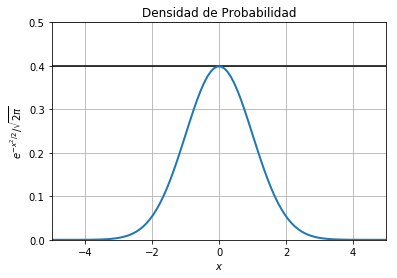

In [4]:
x = linspace(-5,5,100)
plot(x,fn(x,0,1),linewidth=2)
hlines(1/sqrt(2*pi),-5,5)
title('Densidad de Probabilidad')
xlabel('$x$')
ylabel(r'$e^{-x^2/2}/\sqrt{2\pi}$')
xlim(-5,5)
ylim(0,0.5)
grid()

Podemos visualizar cómo el efecto de variar $\mu$ y $\sigma$ con el siguiente gráfico interactivo (bajar y ejecutar el notebook!):

In [5]:
def p(mu=0,sigma=1):
    plot(x,fn(x,mu,sigma),linewidth=2)
    title('Densidad de Probabilidad')
    xlabel('$x$')
    ylabel('$f(x)$')
    xlim(-5,5)
    ylim(0,0.5)
    grid()

In [6]:
from IPython.html.widgets import interact
interact(p,mu=(-5.,5.),sigma=(0.1,5.))

/home/gr/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


interactive(children=(FloatSlider(value=0.0, description='mu', max=5.0, min=-5.0), FloatSlider(value=1.0, description='sigma', max=5.0, min=0.1), Output()), _dom_classes=('widget-interact',))

<function __main__.p>

También podemos usar las funciones definidas en la clase `norm` de scipy.stats, que cargamos usando:

In [7]:
from scipy.stats import norm

La densidad probabilidad es definida entonces por la función `norm.pdf` donde `pdf` se refiere a "*probability density function*", que tiene como opciones a `loc` y `scale`, que permiten indicar el valor medio y la desviación estándar. Por ejemplo `norm.pdf(loc=2,scale=3)` suministra la función densidad de probabilidad con $\mu=2$ y $\sigma=3$. Podemos comprobar esto, con las funciones `norm.mean` y `norm.std`:

In [8]:
norm.mean(loc=2,scale=3), norm.std(loc=2,scale=3)

(2.0, 3.0)

Los valores por defecto de `loc` y `scale` son 0 y 1, respectivamente, es decir, de la distribución estándar:

In [9]:
norm.mean(), norm.std()

(0.0, 1.0)

Comparamos la función densidad de probabilidad implementada en scipy.stats con la que definimos previamente ($\mu=0$, $\sigma=1$):

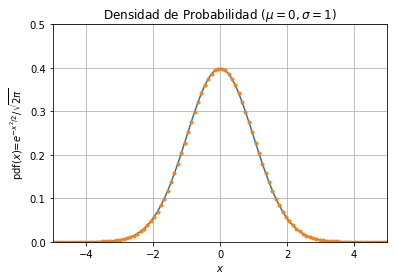

In [10]:
plot(x,norm.pdf(x))
plot(x,fn(x,0,1),'o',markersize=3)
title('Densidad de Probabilidad ($\mu=0, \sigma=1$)')
xlabel('$x$')
ylabel(r'pdf($x$)=$e^{-x^2/2}/\sqrt{2\pi}$')
xlim(-5,5)
ylim(0,0.5)
grid()

Similarmente, podemos graficar la *función de probabilidad acumulada*:
$$
F(x):=\int_{-\infty}^xf(y)dy
$$ 
implementada en la función `norm.cdf` por "*cumulative distribution function*":

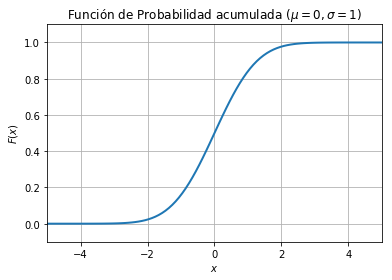

In [11]:
plot(x,norm.cdf(x),linewidth=2)
title(u'Función de Probabilidad acumulada ($\mu=0, \sigma=1$)')
xlabel('$x$')
ylabel('$F(x)$')
xlim(-5,5)
ylim(-0.1,1.1)
grid()

Para generar números aleatorios con esta distribución de probabilidad usamos la función `norm.rvs`, por ejemplo:

In [12]:
norm.rvs(size=5)

array([ 1.4930855 , -1.03472761,  0.26698286,  0.65995904,  1.13799828])

Podemos representar gráficamente los valores aleatorios generados con un simple comando `plot`, por ejemplo:

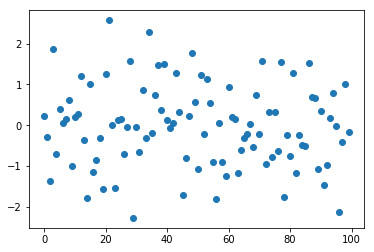

In [13]:
plot(norm.rvs(size=100),'o')

A continuación, comparamos el conteo (histograma) de los valores generados por `norm.rvs` con los valores esperados de acuerdo a función densidad de probabilidad. Ya que la distribución de probabilidad es  continua en este caso, es necesario tomar en cuenta el *tamaño de los intervalos* ($\Delta x$) en los que se dividirá la recta real (de valores posibles de $x$), y que definen el ancho de los bins a considerar en el histograma. 

Si $n_i$ son los valores correspondientes al conteo de datos en un intervalo de ancho $\Delta x$ centrado en el valor $x_i$, entonces esperamos que, para $\Delta x$ suficientemente pequeño,
$$
    \int_{x_i-(\Delta x)/2}^{x_i+(\Delta x)/2}f(x)\,dx\approx f(x_i)\Delta x\rightarrow \frac{n_i}{N},
$$
y por lo tanto,
$$
    n_i\rightarrow Nf(x_i)\Delta x,
$$
donde $N=\sum n_i$ es el número total de datos de la muestra.

En el siguiente ejemplo, graficamos el histograma correspondiente a 1 millón de valores aleatorios generados con $\mu=0$ y $\sigma=1$ y los comparamos con el valor esperado $Nf(x_i)\Delta x$, eligiendo $\Delta x$ de modo que los datos de la muestra estén divididos en 20 bins:

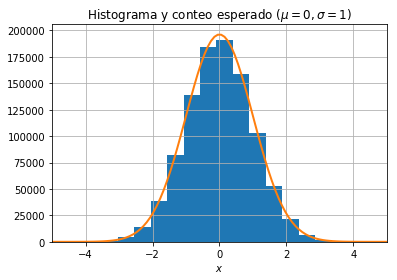

In [14]:
N=10**6 # número de elementos de la muestra
bi=20 # número de bins
rv=norm.rvs(size=N) # N variables aleatorias
Dx=(max(rv)-min(rv))/bi # intervalo de x entre bins
hist(rv,bins=bi)
plot(x,N*Dx*norm.pdf(x), lw=2)
title('Histograma y conteo esperado ($\mu=0, \sigma=1$)')
xlabel('$x$')
xlim(-5,5)
grid()

Finalmente, el siguiente gráfico interactivo permite apreciar cómo varía el gráfico anterior al considerar valores distintos de $N$ y el número de bins:

In [15]:
def p2(N=10**4,bi=10):
    rv=norm.rvs(size=N) # N variables aleatorias
    D=(max(rv)-min(rv))/bi # intervalo de x entre bins
    hist(rv,bins=bi)
    plot(x,N*D*norm.pdf(x), lw=2)
    title('Histograma y conteo esperado ($\mu=0, \sigma=1$)')
    xlabel('$x$')
    xlim(-5,5)
    grid()

In [16]:
from ipywidgets import interact

In [17]:
interact(p2,N=(10**3,10**6,10**3),bi=(1,100,10))

interactive(children=(IntSlider(value=10000, description='N', max=1000000, min=1000, step=1000), IntSlider(value=10, description='bi', min=1, step=10), Output()), _dom_classes=('widget-interact',))

<function __main__.p2>